# indian diabetes predection

### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



### Pima Indians Diabetes Database
#### Predict the onset of diabetes based on diagnostic measures

### import packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [2]:
dataset = pd.read_csv('diabetes.csv')
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


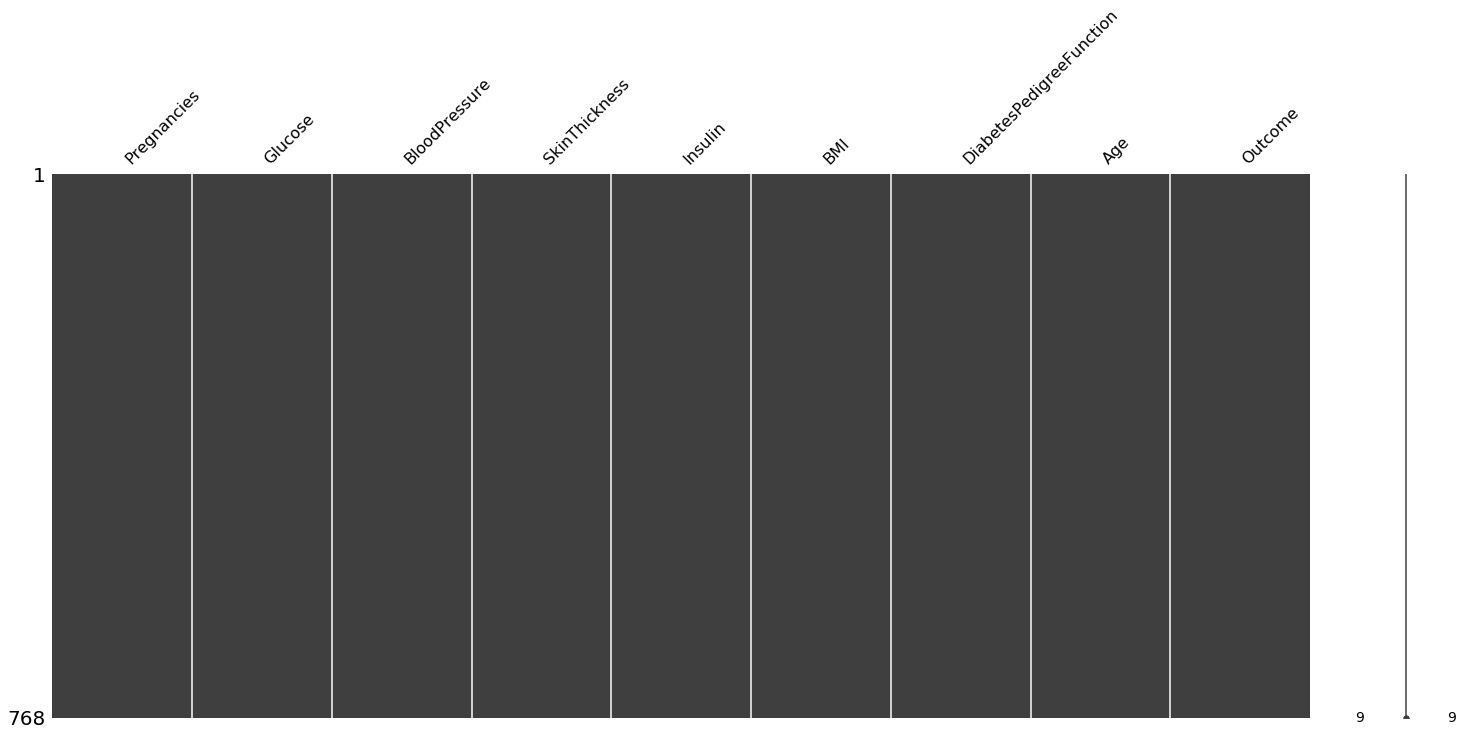

In [6]:
ms.matrix(dataset)

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### split train and test 


In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


c:\program files (x86)\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Feature Scaling

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Co-relationship and heatmap

The goal of this document is to show you how to visualize correlation matrix using R heatmap function. This type of plot can help to quickly identify the most correlated variables. You can read more on correlation matrix

Text(0.5,1,'data_train.corr()')

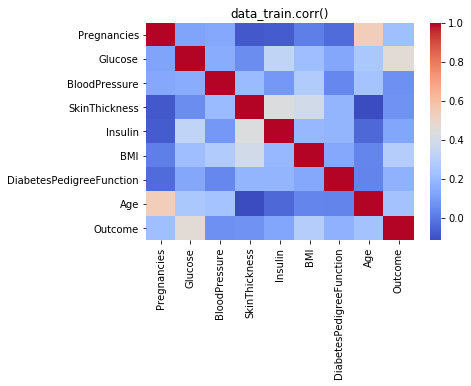

In [10]:
sns.heatmap(dataset.corr(),cmap='coolwarm',xticklabels=True)
plt.title('data_train.corr()')

### Principal Component Analysis Tutorial
The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. The same is done by transforming the variables to a new set of variables, which are known as the principal components (or simply, the PCs) and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order.

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


explained variance is a variable which consists of column variance, we have to denote at n_components if we place none it will return all the columns variance if place 2 or 3 columns.

In [12]:
explained_variance

array([0.26368204, 0.22267071, 0.12826521, 0.10926875, 0.09353943,
       0.08281762, 0.05142718, 0.04832906])

So we applying n_components = 3 it returns only 3 columns top variance. 

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


### Fitting Logistic Regression to the Training set


In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_train)

## Confusion matrix for predection

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)

In [17]:
cm

array([[282,  47],
       [ 94,  89]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.724609375

Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 3)
X_train =  lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

Applying data to model

In statistics, the logistic model (or logit model) is a statistical model that is usually taken to apply to a binary dependent variable. In regression analysis, logistic regression or logit regression is estimating the parameters of a logistic model. More formally, a logistic model is one where the log-odds of the probability of an event is a linear combination of independent or predictor variables. The two possible dependent variable values are often labelled as "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. The binary logistic regression model can be generalized to more than two levels of the dependent variable: categorical outputs with more than two values are modelled by multinomial logistic regression, and if the multiple categories are ordered, by ordinal logistic regression, for example the proportional odds ordinal logistic model.

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
y_pred = classifier.predict(X_train)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)

In [23]:
cm

array([[282,  47],
       [ 95,  88]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.72265625

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970's as a non-parametric technique. Algorithm.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred))

[[280  49]
 [ 67 116]]
0.7734375


Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). It is one of the predictive modelling approaches used in statistics, data mining and machine learning. Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.



In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [28]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred))

[[329   0]
 [  0 183]]
1.0
